# Yelp Review

In [3]:
import pandas as pd
import tqdm
from tqdm import tqdm
import regex as re 
import spacy
nlp = spacy.load("en_core_web_lg")

### Overview
My goal with this Machine Learning Model is to help Yelp or a Business Owner automactically rate a reviewer's review. I used the 'text' columns which represents the review

## Data Exploration

In [4]:
reviews_df = pd.read_csv('data/review.csv', engine='python', error_bad_lines=False)
business_df = pd.read_csv('data/business.csv', engine='python', error_bad_lines=False)

In [5]:
reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6.0,1.0,0.0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0.0,0.0,0.0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3.0,0.0,0.0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0.0,0.0,0.0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7.0,0.0,0.0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


In [6]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,hours,attributes.GoodForKids,attributes.RestaurantsReservations,attributes.GoodForMeal,attributes.BusinessParking,attributes.Caters,attributes.NoiseLevel,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.RestaurantsPriceRange2,attributes.OutdoorSeating,attributes.BikeParking,attributes.Ambience,attributes.HasTV,attributes.WiFi,attributes.Alcohol,attributes.RestaurantsAttire,attributes.RestaurantsGoodForGroups,attributes.RestaurantsDelivery,hours.Monday,hours.Tuesday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,attributes.BusinessAcceptsCreditCards,attributes,attributes.BusinessAcceptsBitcoin,attributes.ByAppointmentOnly,attributes.AcceptsInsurance,attributes.Music,attributes.GoodForDancing,attributes.CoatCheck,attributes.HappyHour,attributes.BestNights,attributes.WheelchairAccessible,attributes.DogsAllowed,attributes.BYOBCorkage,attributes.DriveThru,attributes.Smoking,attributes.AgesAllowed,attributes.HairSpecializesIn,attributes.Corkage,attributes.BYOB,attributes.DietaryRestrictions,attributes.Open24Hours,attributes.RestaurantsCounterService
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,"Golf, Active Life",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"Specialty Food, Restaurants, Dim Sum, Imported...",NaN,True,True,"{'dessert': False, 'latenight': False, 'lunch'...","{'garage': False, 'street': False, 'validated'...",True,u'loud',True,True,2,False,False,"{'romantic': False, 'intimate': False, 'classy...",False,u'no',u'full_bar',u'casual',True,False,9:0-0:0,9:0-0:0,9:0-0:0,9:0-0:0,9:0-1:0,9:0-1:0,9:0-0:0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"Sushi Bars, Restaurants, Japanese",NaN,True,True,"{'dessert': False, 'latenight': False, 'lunch'...","{'garage': False, 'street': False, 'validated'...",False,u'average',True,True,2,False,True,"{'romantic': False, 'intimate': False, 'touris...",True,u'no',u'beer_and_wine','casual',True,False,17:30-21:30,NaN,17:30-21:30,17:30-21:30,17:30-22:0,17:30-22:0,17:30-21:0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,"Insurance, Financial Services",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"Plumbing, Shopping, Local Services, Home Servi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
reviews_df.shape

(6685902, 9)

In [8]:
business_df['state'].value_counts()

AZ     56686
NV     36312
ON     33412
NC     14720
OH     14697
PA     11216
QC      9219
AB      8012
WI      5154
IL      1932
SC      1162
NY        22
CA        19
TX         6
FL         4
XGM        4
CT         3
WA         3
AL         3
VT         2
AK         2
VA         2
NE         2
XWY        2
GA         2
UT         1
BC         1
DOW        1
AR         1
DUR        1
NJ         1
TN         1
BAS        1
CON        1
XGL        1
NM         1
Name: state, dtype: int64

In [9]:
reviews_df_copy = reviews_df.drop(columns = {'review_id', 'date', 'useful', 'funny', 'cool'})
business_df_copy = business_df.drop(columns = {'name', 'address', 'postal_code', 'latitude', 'longitude', 'is_open', 'city', 'review_count','hours','attributes.GoodForKids', 'attributes.RestaurantsReservations', 'attributes.GoodForMeal', 'attributes.BusinessParking', 'attributes.Caters', 'attributes.NoiseLevel', 'attributes.RestaurantsTableService', 'attributes.RestaurantsTakeOut', 'attributes.RestaurantsPriceRange2', 'attributes.OutdoorSeating','attributes.BikeParking', 'attributes.Ambience', 'attributes.HasTV', 'attributes.WiFi', 'attributes.Alcohol', 'attributes.RestaurantsAttire', 'attributes.RestaurantsGoodForGroups', 'attributes.RestaurantsDelivery', 'hours.Monday', 'hours.Tuesday', 'hours.Wednesday', 'hours.Thursday', 'hours.Friday', 'hours.Saturday', 'hours.Sunday','attributes.BusinessAcceptsCreditCards','attributes','attributes.BusinessAcceptsBitcoin','attributes.ByAppointmentOnly','attributes.AcceptsInsurance','attributes.Music','attributes.GoodForDancing','attributes.CoatCheck','attributes.HappyHour','attributes.BestNights','attributes.WheelchairAccessible','attributes.DogsAllowed','attributes.BYOBCorkage','attributes.DriveThru','attributes.Smoking','attributes.AgesAllowed','attributes.HairSpecializesIn','attributes.Corkage','attributes.BYOB','attributes.DietaryRestrictions','attributes.Open24Hours','attributes.RestaurantsCounterService'})
business_df_copy = business_df_copy.rename(columns={'stars' : 'rating'})

In [10]:
''' Merging the DataFrames '''
reviews_df_merged = pd.merge(reviews_df_copy, business_df_copy, how='inner')

In [11]:
print(reviews_df_merged.shape)
reviews_df_merged.head()

(6685900, 7)


,user_id,business_id,stars,text,state,rating,categories
0,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,Total bill for this horrible service? Over $8G...,NV,2.5,"Fitness & Instruction, Doctors, Health & Medic..."
1,RBXSJA372ilErzNwz0jXvQ,ujmEBvifdJM6h6RLv4wQIg,4.0,My family has used this ER four times in the p...,NV,2.5,"Fitness & Instruction, Doctors, Health & Medic..."
2,x3brMMbJrAW9PwW5A6YL5w,ujmEBvifdJM6h6RLv4wQIg,1.0,I have never been more disappointed by the car...,NV,2.5,"Fitness & Instruction, Doctors, Health & Medic..."
3,Skzdl0sWhW88525a1vr59g,ujmEBvifdJM6h6RLv4wQIg,1.0,"Went in for a broken finger, was asked if I wa...",NV,2.5,"Fitness & Instruction, Doctors, Health & Medic..."
4,3Y25VDfnQVcuc33T-U3Z6A,ujmEBvifdJM6h6RLv4wQIg,5.0,My mother was at Mountain View for nearly two ...,NV,2.5,"Fitness & Instruction, Doctors, Health & Medic..."


### Filter the Dataframe on Ontario and Restaurant

In [12]:
reviews_df_merged = reviews_df_merged[reviews_df_merged['state']=='ON']
reviews_df_merged.shape

(784461, 7)

In [13]:
reviews_df_merged.isnull().sum()

user_id          0
business_id      0
stars            0
text             0
state            0
rating           0
categories     326
dtype: int64

In [14]:
reviews_df_merged = reviews_df_merged.dropna()
reviews_df_merged.shape

(784135, 7)

In [15]:
categories = ['Restaurant', 'Restaurants']
reviews_df_merged = reviews_df_merged[reviews_df_merged['categories'].str.contains('|'.join(categories))]
reviews_df_merged.shape

(574253, 7)

In [16]:
reviews_df_merged.head()

,user_id,business_id,stars,text,state,rating,categories
592,jlu4CztcSxrKx56ba1a5AQ,3fw2X5bZYeW9xCz_zGhOHg,3.0,Tracy dessert had a big name in Hong Kong and ...,ON,3.5,"Food, Chinese, Restaurants, Desserts"
593,nkSf1NKWFGiAyrnCa-A5UA,3fw2X5bZYeW9xCz_zGhOHg,3.0,The squid balls were AMAZING. Crispy exterior ...,ON,3.5,"Food, Chinese, Restaurants, Desserts"
594,jG7130OQWiftvHhtyabsog,3fw2X5bZYeW9xCz_zGhOHg,4.0,"Must Try: Mango Sago with Pommels, Shaved Ice ...",ON,3.5,"Food, Chinese, Restaurants, Desserts"
595,wdCwBv_TA_Y-IjUZv2HWWQ,3fw2X5bZYeW9xCz_zGhOHg,1.0,We came on a Friday and the store said that th...,ON,3.5,"Food, Chinese, Restaurants, Desserts"
596,kxz6Q2AERQeo9x6nnbHZNg,3fw2X5bZYeW9xCz_zGhOHg,3.0,I think this is a cool little hang out place f...,ON,3.5,"Food, Chinese, Restaurants, Desserts"


In [17]:
reviews_df_merged['categories'].value_counts()

Chinese, Restaurants                                                        8691
Restaurants, Chinese                                                        6846
Italian, Restaurants                                                        5569
Thai, Restaurants                                                           5291
Restaurants, Italian                                                        5226
                                                                            ... 
Afghan, Middle Eastern, Mediterranean, Vegan, Restaurants                      3
Food, Beer, Wine & Spirits, Restaurants, Bars, Canadian (New), Nightlife       3
Restaurants, Cafes, Caterers, Event Planning & Services                        3
Food, Fast Food, Restaurants, Specialty Food                                   3
Active Life, Restaurants, Cafes, Bowling                                       3
Name: categories, Length: 8299, dtype: int64

In [18]:
reviews_df_merged['categories'].nunique()

8299

In [19]:
reviews_df_merged['stars'].value_counts()

4.0    184904
5.0    160200
3.0    105946
1.0     62365
2.0     60838
Name: stars, dtype: int64

In [20]:
reviews_df_merged['rating'].value_counts()

3.5    189181
4.0    176919
3.0    108139
4.5     49191
2.5     34672
2.0     10922
5.0      2423
1.5      2248
1.0       558
Name: rating, dtype: int64

<AxesSubplot:>

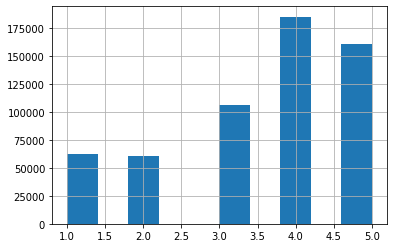

In [21]:
reviews_df_merged['stars'].hist()

<AxesSubplot:>

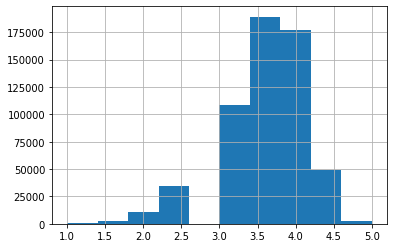

In [22]:
reviews_df_merged['rating'].hist()

### Create Star Rating Categories

- <4 Bad
- =4 Good
- =5 Excellent

In [23]:
star_categories = []

for star in reviews_df_merged['stars']:
    if star == 5.0:
        star_categories.append('Excellent')
    elif star == 4.0:
        star_categories.append('Good')
    elif star < 4.0:
        star_categories.append('Bad')
    else:
        star_categories.append('NA')
        
reviews_df_merged['star_categories'] = star_categories
reviews_df_merged.head()

,user_id,business_id,stars,text,state,rating,categories,star_categories
592,jlu4CztcSxrKx56ba1a5AQ,3fw2X5bZYeW9xCz_zGhOHg,3.0,Tracy dessert had a big name in Hong Kong and ...,ON,3.5,"Food, Chinese, Restaurants, Desserts",Bad
593,nkSf1NKWFGiAyrnCa-A5UA,3fw2X5bZYeW9xCz_zGhOHg,3.0,The squid balls were AMAZING. Crispy exterior ...,ON,3.5,"Food, Chinese, Restaurants, Desserts",Bad
594,jG7130OQWiftvHhtyabsog,3fw2X5bZYeW9xCz_zGhOHg,4.0,"Must Try: Mango Sago with Pommels, Shaved Ice ...",ON,3.5,"Food, Chinese, Restaurants, Desserts",Good
595,wdCwBv_TA_Y-IjUZv2HWWQ,3fw2X5bZYeW9xCz_zGhOHg,1.0,We came on a Friday and the store said that th...,ON,3.5,"Food, Chinese, Restaurants, Desserts",Bad
596,kxz6Q2AERQeo9x6nnbHZNg,3fw2X5bZYeW9xCz_zGhOHg,3.0,I think this is a cool little hang out place f...,ON,3.5,"Food, Chinese, Restaurants, Desserts",Bad


<AxesSubplot:>

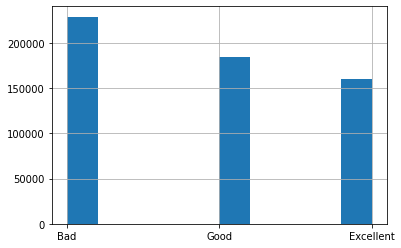

In [24]:
reviews_df_merged['star_categories'].hist()

In [25]:
reviews_df_merged['star_categories'].value_counts()

Bad          229149
Good         184904
Excellent    160200
Name: star_categories, dtype: int64

### Tokenize, Remove Stop words, and Punct

In [26]:
df = reviews_df_merged.sample(12000).reset_index()
df.head()

,index,user_id,business_id,stars,text,state,rating,categories,star_categories
0,425315,MLRWv2wp2oVebnFoPgOVpg,Z2xzlKPgUntqq6wg5eoU-w,4.0,I went to this place with bunch of friends on ...,ON,3.0,"Thai, Restaurants, Vietnamese, Japanese",Good
1,1718569,36w8-rRzvQtLkgVaj6Hunw,Grr2wJ3nYD_7qUyespDglA,5.0,We are staying at a hotel on King Street. No c...,ON,4.5,"Greek, Restaurants, Italian, Pizza",Excellent
2,3841708,0BBUmH7Krcax1RZgbH4fSA,4LXZzgsrM1ZyS_-uB9Od2Q,3.0,I was really disappointed. The website said th...,ON,3.5,"Restaurants, Italian, Pizza",Bad
3,5250726,GdOftL3cyuc7Ir89iIzSvQ,fyekfJA4hXNgMQ09HL9WIA,4.0,Arrive early - correction: arrive before it op...,ON,4.5,"Food, Specialty Food, Restaurants, Italian",Good
4,5760094,BGzavA_ddMr-jGmhArv7fg,eW6_05mOgBaqX4OD2oWC_g,3.0,Whimsical! That's the word to describe the hel...,ON,4.5,"Food, Bistros, Canadian (New), Restaurants, Am...",Bad


<AxesSubplot:>

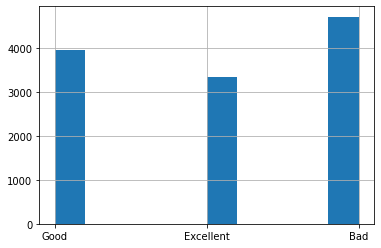

In [27]:
df['star_categories'].hist()

In [28]:
def token_clean(doc_list):
    #Extract tokens from reviews using Spacy
    # nlp.Defaults.stop_words |= {"my_new_stopword1","my_new_stopword2",}

    other_words = []

    tokens = []

    for document in tqdm(doc_list):
        doc = re.sub("[^a-zA-Z]+"," ",str(document))
        doc = doc.lower().strip()
        doc = nlp(doc)
        doc = [token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True) and (str(token) not in other_words) and (str(token).isdigit() != True) and (len(str(token)) >1)]
        tokens.append(doc)
        
    return tokens

In [29]:
df['tokens'] = token_clean(df['text'])

100%|██████████| 12000/12000 [15:23<00:00, 12.99it/s]


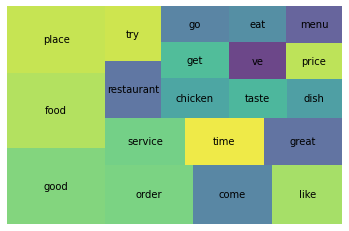

In [30]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')
    
wc = count(df['tokens'])

import squarify
import matplotlib.pyplot as plt
import seaborn as sns

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### Find Baseline

In [31]:
df['star_categories'].value_counts(normalize=True).sort_index()

Bad          0.3925
Excellent    0.2775
Good         0.3300
Name: star_categories, dtype: float64

## Check TFIDF features

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2),
                      max_df=0.97,
                      min_df=2)

description = df['tokens'].astype(str)

dtm = tfidf.fit_transform(description)

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm.head()

,aaa,aaa beef,ab,abalone,abandon,abbas,abbot,ability,abit,able,able accommodate,able attention,able cater,able chat,able choose,able come,able eat,able enjoy,able find,able finish,able fit,able free,able grab,able handle,able hear,able help,able leftover,able order,able pair,able park,able pay,able pick,able place,able provide,able receive,able reservation,able sample,able seat,able serve,able sit,able snag,able spot,able squeeze,able table,able taste,able tell,able try,able watch,able work,abnormally,abound,abrupt,abruptly,abruzzo,absence,absent,absolute,absolute bad,absolute delight,absolute favorite,absolute favourite,absolute gem,absolute good,absolute joke,absolute mess,absolute pleasure,absolutely,absolutely adore,absolutely amazing,absolutely awesome,absolutely bad,absolutely come,absolutely delicious,absolutely delightful,absolutely delish,absolutely disgusting,absolutely divine,absolutely fabulous,absolutely fantastic,absolutely filthy,absolutely flavour,absolutely food,absolutely fresh,absolutely good,absolutely gorgeous,absolutely great,absolutely hate,absolutely horrible,absolutely huge,absolutely incredible,absolutely love,absolutely massive,absolutely notch,absolutely outstanding,absolutely pack,absolutely perfect,absolutely reason,absolutely recommend,absolutely ridiculous,absolutely stuff,absolutely stunning,absolutely terrible,absolutely tiny,absolutely try,absolutely wonderful,absolutely worth,absolutely yummy,absorb,absorb sauce,absurd,absurdly,absurdly good,abt,abundance,abundance food,abundance sauce,abundant,abundant quantity,aburi,aburi signature,aburi special,aburi sushi,abuse,abusive,abut,abv,abysmal,ac,ac blast,ac unit,acai,acai bowl,acc,accawi,accent,accept,accept apology,accept cash,accept credit,accept debit,accept reservation,accept visa,acceptable,acceptable food,acceptable server,acceptable time,acceptance,access,access car,accessibility,accessible,accessible foot,accessible step,accessory,accessory shop,accident,accident happen,accident order,accidentally,accidentally charge,accidentally forget,accidentally knock,acclaim,accolade,accommodate,accommodate big,accommodate bring,accommodate crowd,accommodate decor,accommodate dietary,accommodate different,accommodate food,accommodate friendly,accommodate give,accommodate great,accommodate group,accommodate guest,accommodate help,accommodate large,accommodate lot,accommodate need,accommodate party,accommodate patron,accommodate people,accommodate request,accommodate small,accommodate table,accommodate taste,accommodate time,accommodate vegetarian,accommodate wait,accommodating,accommodating food,accommodating friend,accommodating like,accommodating place,accommodating try,accommodation,accommodation request,accomodate,accomodating,accompaniment,accompaniment work,accompany,accompany coconut,accompany dish,accompany fry,accompany meal,accompany sandwich,accompany sauce,accompanying,accomplish,accord,accord friend,accord server,accord waitress,accordingly,accost,account,account allow,account bad,accouterment,accoutrement,accra,accumulate,accuracy,accurate,accurate rating,accurate service,accurately,accusation,accuse,accustomed,ace,ache,achieve,achievement,acid,acidic,acidity,ackee,ackee saltfish,acknowledge,acknowledge come,acknowledge existence,acknowledge presence,acknowledge seat,acknowledge think,acknowledge wait,acknowledgement,...,yes large,yes like,yes little,yes live,yes look,yes oh,yes order,yes pay,yes people,yes place,yes read,yes recommend,yes restaurant,yes right,yes run,yes say,yes service,yes staff,yes start,yes sure,yes talk,yes taste,yes tasty,yes think,yes time,yes true,yes try,yes vegetarian,yes wait,yes waiter,yes yes,yesterday,yesterday dinner,yesterday evening,yesterday friend,yesterday go,yesterday lunch,yesterday morning,yesterday night,yesterday order,yeung,yeung chow,yield,yikes,yikes order,yin,yin yang,yo,yogen,yogen fruz,yoghurt,yoghurt mousse,yogurt,yogurt base,yogurt drink,yogurt mousse,yogurt parfait,yogurt sauce,yogurty

## Split Data

In [33]:
df['tokens']= df['tokens'].astype(str)

# Define how much percent data you wanna split
split_pcent = 0.20
split = int(split_pcent * len(df))

# Shuffles dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [46]:
df.shape

(12000, 10)

In [47]:
df.to_csv('data/cleaned_merged.csv', index=False)

In [34]:
feature = "tokens"
target = "star_categories"

# Training Sets
train = df[split:]
X_train = train[feature]
y_train = train[target]

# Validation Sets
valid = df[:split]
X_valid = valid[feature]
y_valid = valid[target]

## Random Forest Classifier

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5000, algorithm='randomized',n_iter=10)
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
rfc = RandomForestClassifier()

In [36]:
params = {
    'lsi__svd__n_components': [10,50,100],
    'lsi__vect__min_df':[.02,.05],
    'lsi__vect__max_df':[.9, .95, 1.0],
    'lsi__vect__ngram_range':[(1,1),(1,2),(1,3)],
    'clf__n_estimators':[300,500,1000]}

In [37]:
# LSI
lsi = Pipeline([('vect', vect), ('svd', svd)])

# Pipe
pipe = Pipeline([('lsi', lsi), ('clf', rfc)])

In [38]:
# Fit
from sklearn.model_selection import RandomizedSearchCV

grid_search = RandomizedSearchCV(pipe,params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 30.0min finished


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('lsi',
                                              Pipeline(steps=[('vect',
                                                               TfidfVectorizer(ngram_range=(1,
                                                                                            2),
                                                                               stop_words='english')),
                                                              ('svd',
                                                               TruncatedSVD(n_components=5000,
                                                                            n_iter=10))])),
                                             ('clf',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'clf__n_estimators': [300, 500, 1000],
                                        'lsi__svd__n_components

In [39]:
grid_search.best_score_

0.5748958333333333

In [40]:
grid_search.best_params_

{'lsi__vect__ngram_range': (1, 3),
 'lsi__vect__min_df': 0.02,
 'lsi__vect__max_df': 0.95,
 'lsi__svd__n_components': 100,
 'clf__n_estimators': 1000}

### Evaluation: classfication report & confusion matrix 

In [41]:
pipeline = grid_search.best_estimator_

In [42]:
y_pred = pipeline.predict(X_valid)

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

         Bad       0.64      0.81      0.71       932
   Excellent       0.63      0.41      0.50       698
        Good       0.49      0.48      0.48       770

    accuracy                           0.59      2400
   macro avg       0.59      0.57      0.57      2400
weighted avg       0.59      0.59      0.58      2400



In [44]:
valid.head()

,index,user_id,business_id,stars,text,state,rating,categories,star_categories,tokens
0,5187187,Dym1vn-YOcQAcR-cJOGMFg,EKnbQlntPX0FsgAC94XniA,3.0,Very bad service to start with. Came with grou...,ON,3.0,"Chinese, Noodles, Restaurants",Bad,"['bad', 'service', 'start', 'come', 'group', '..."
1,1831372,Ybs6-fKCp2pwsfSevZ5cKg,MLQeuiL9rqOq_rDKGEcU0A,2.0,"So-so. Meals were OK, dry martini wasn't, and ...",ON,3.5,"Restaurants, Pizza, Italian",Bad,"['meal', 'ok', 'dry', 'martini', 'wasn', 'fini..."
2,4564496,kgcaYt5PFkdzznmdV3VNXw,4MLQG9gKglkALP0EnsEMeA,4.0,Good food. Reasonably priced. The royal pad Th...,ON,3.5,"Restaurants, Thai",Good,"['good', 'food', 'reasonably', 'price', 'royal..."
3,2980901,3odcL7qzm2EwEh4Y9aFcdg,KVpvE6pOPM9KMvak4HFsNg,1.0,The pizzas here are really nothing special. I ...,ON,4.0,"Restaurants, Italian, Pizza",Bad,"['pizza', 'special', 'don', 'understand', 'hyp..."
4,5137087,blzoo8N0xhXbThjRBMbEqQ,BTxJv_Ad8bCxYfbC6w3ugA,5.0,"I got a tafu sandwich, at first was skeptical ...",ON,4.0,"Vietnamese, Restaurants, Sandwiches",Excellent,"['get', 'tafu', 'sandwich', 'skeptical', 'plac..."


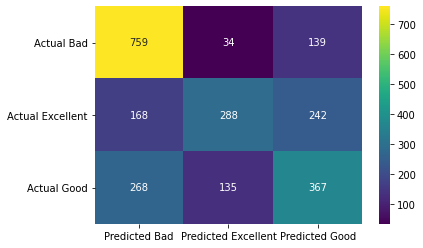

In [45]:
import seaborn as sns
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

plot_confusion_matrix(y_valid, y_pred);

## Export model